In [1]:
import matplotlib.pyplot as plt
from optalgotools.structures import Node
from optalgotools.routing import cost
import networkx as nx
import heapq

# Load nodes and edges
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "S"])

edges = [
    ("A", "B", {"weight": 4}),
    ("A", "C", {"weight": 3}),
    ("A", "S", {"weight": 2}),
    ("B", "D", {"weight": 3}),
    ("B", "S", {"weight": 4}),
    ("C", "E", {"weight": 4}),
    ("C", "D", {"weight": 5}),
    ("D", "E", {"weight": 6}),
    ("D", "F", {"weight": 5}),
    ("E", "F", {"weight": 7}),
    ("E", "G", {"weight": 3}),
    ("F", "G", {"weight": 3}),
]

G.add_edges_from(edges)
G=G.to_directed()

In [2]:
def dummy_astar_heuristic(G, origin, destination):
    """This heuristic uses constant values, since our graph isn't really represented in 2D space to scale, and thus the straight-line distances between nodes cannot be readily determined."""

    # The destination is always G, so this is just a list of straight line distances to G
    STRAIGHT_LINE = {
        "S": 11.3,
        "A": 9.5,
        "B": 10.2,
        "C": 5.6,
        "D": 6.2,
        "E": 4.4,
        "F": 3.8,
        "G": 0,
    }
    return STRAIGHT_LINE

In [3]:
def A_Star(
    G, origin, destination, heuristic_fn, cost_fn, cost_kwargs={}, expand_kwargs={}
):
    toDestination = heuristic_fn(G, origin, destination)
    toOrigin = {}
    route = []
    frontier = list()
    frontier.append(origin)
    toOrigin[origin] = 0
    explored = set()
    found = False
    while frontier and not found:
        # choose a node based on its heuristic value
        node = min(frontier, key=lambda node: toOrigin[node] + toDestination[node])
        frontier.remove(node)
        explored.add(node)
        # expand its children
        for child in node.expand(**expand_kwargs):
            if child not in explored and child not in frontier:
                if child == destination:
                    route = child.path()
                    found = True
                    continue
                frontier.append(child)
                toOrigin[child] = cost_fn(G, child.path(), **cost_kwargs)
    return route

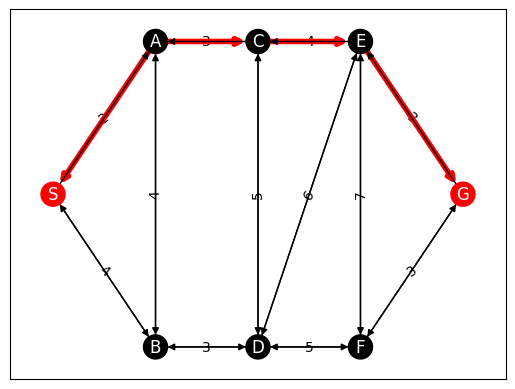

In [4]:
result = A_Star(
    G,
    Node(G, "S"),
    Node(G, "G"),
    dummy_astar_heuristic,
    cost,
    expand_kwargs={"attr_name": "weight"},
    cost_kwargs={"attr_name": "weight"},
)

pos = {
    "S": (0, 1),
    "A": (1, 2),
    "B": (1, 0),
    "C": (2, 2),
    "D": (2, 0),
    "E": (3, 2),
    "F": (3, 0),
    "G": (4, 1),
}

node_colors = ["r" if n == "S" or n == "G" else "k" for n in list(G.nodes)]
highlight_edges = list((zip(result[:-1], result[1:])))
highlight_edges = [tuple(sorted(e)) for e in highlight_edges]
edge_colors = ["r" if e in highlight_edges else "k" for e in list(G.edges)]
edge_widths = [4 if e in highlight_edges else 1 for e in list(G.edges)]
labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_colors,
    font_color="w",
    edge_color=edge_colors,
    width=edge_widths,
)
plt.show()